In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the student parameters dataset
df = pd.read_csv('output/langchain_student_params_1500.csv')


In [7]:
df.shape

(1500, 35)

In [2]:

# 2) Separate numeric vs. categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 3) One-hot encode if needed
if categorical_cols:
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    df_encoded = df.copy()


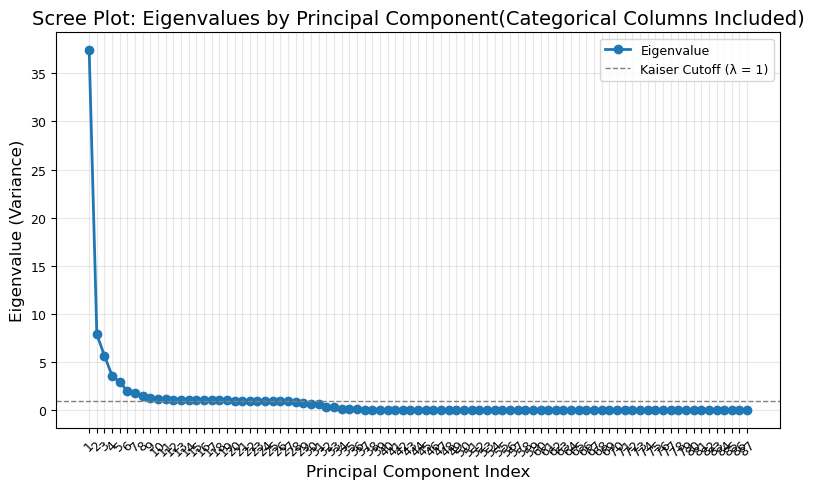

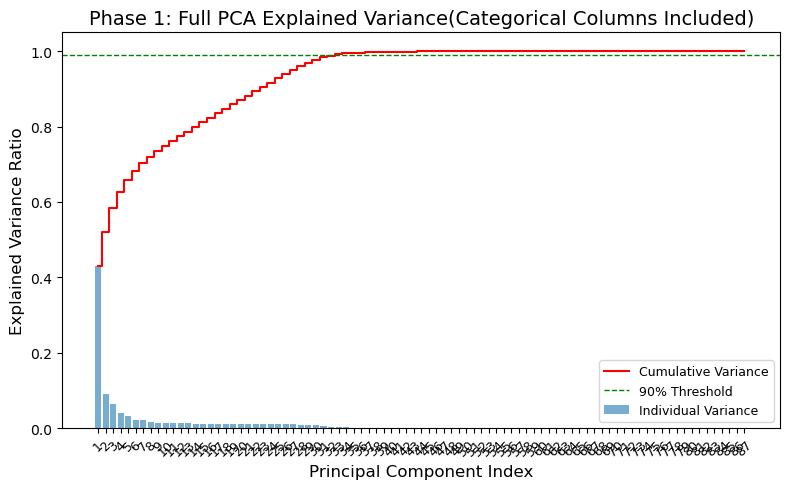

Phase 1 → Optimal number of components = 33 (captures ≥ 99% variance when Categorical Columns Included)


In [3]:

# 4) Standardize all features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

pca_full = PCA()                 
pca_full.fit(X_scaled)           

# 5a) Extract raw eigenvalues (variance along each PC) → for the scree plot
eigenvalues = pca_full.explained_variance_

# 5b) Extract the explained-variance ratios and cumulative variance → for the cumulative plot
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# ─────────────────────────────────────────────────────────────────────────────
# 6a) Scree Plot (Eigenvalue vs. Component Index)
components = np.arange(1, len(eigenvalues) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, eigenvalues, 'o-', linewidth=2, markersize=6, label='Eigenvalue')
plt.axhline(y=1.0, color='gray', linestyle='--', linewidth=1, label='Kaiser Cutoff (λ = 1)')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Eigenvalue (Variance)', fontsize=12)
plt.title('Scree Plot: Eigenvalues by Principal Component(Categorical Columns Included)', fontsize=14)
plt.xticks(components, rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(alpha=0.3)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

threshold = 0.99


# ─────────────────────────────────────────────────────────────────────────────
# 6b) Cumulative Explained-Variance Plot (same as before, just for reference)
plt.figure(figsize=(8, 5))
plt.bar(components, explained_variance_ratio, alpha=0.6, label='Individual Variance')
plt.step(components, cumulative_variance, where='mid', color='red', label='Cumulative Variance')
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=1, label='90% Threshold')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Phase 1: Full PCA Explained Variance(Categorical Columns Included)', fontsize=14)
plt.xticks(components, rotation=45, fontsize=9)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# 7) Find “k” = smallest number of components with ≥ 90% cumulative variance
k = np.argmax(cumulative_variance >= threshold) + 1
print(f"Phase 1 → Optimal number of components = {k} (captures ≥ {threshold*100:.0f}% variance when Categorical Columns Included)")


In [4]:
df_encoded = df[numeric_cols]

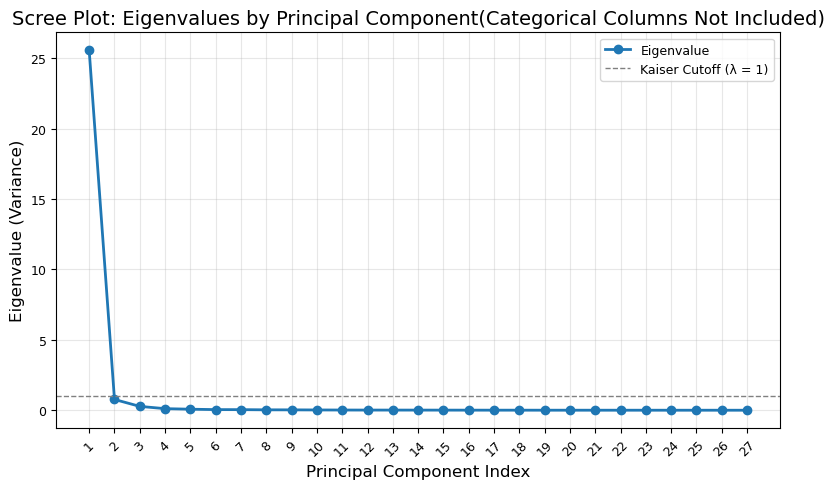

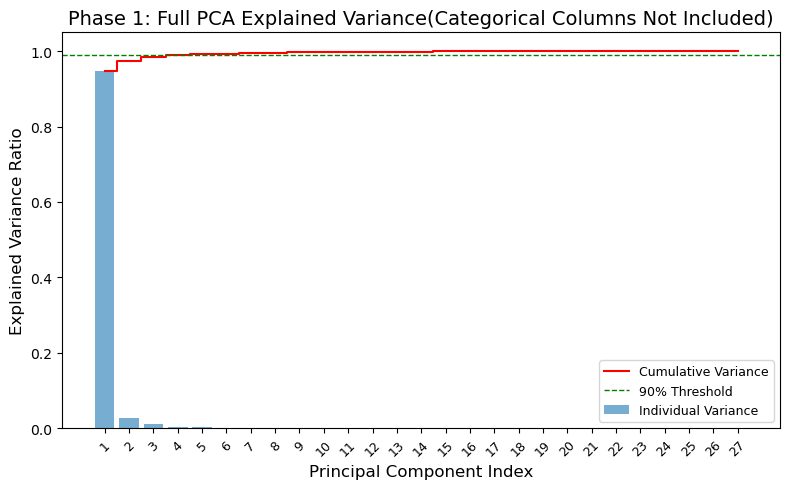

Phase 1 → Optimal number of components = 5 (captures ≥ 99% variance when Categorical Columns Not Included)


In [5]:

# 4) Standardize all features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

pca_full = PCA()                 
pca_full.fit(X_scaled)           

# 5a) Extract raw eigenvalues (variance along each PC) → for the scree plot
eigenvalues = pca_full.explained_variance_

# 5b) Extract the explained-variance ratios and cumulative variance → for the cumulative plot
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# ─────────────────────────────────────────────────────────────────────────────
# 6a) Scree Plot (Eigenvalue vs. Component Index)
components = np.arange(1, len(eigenvalues) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, eigenvalues, 'o-', linewidth=2, markersize=6, label='Eigenvalue')
plt.axhline(y=1.0, color='gray', linestyle='--', linewidth=1, label='Kaiser Cutoff (λ = 1)')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Eigenvalue (Variance)', fontsize=12)
plt.title('Scree Plot: Eigenvalues by Principal Component(Categorical Columns Not Included)', fontsize=14)
plt.xticks(components, rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(alpha=0.3)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

threshold = 0.99


# ─────────────────────────────────────────────────────────────────────────────
# 6b) Cumulative Explained-Variance Plot (same as before, just for reference)
plt.figure(figsize=(8, 5))
plt.bar(components, explained_variance_ratio, alpha=0.6, label='Individual Variance')
plt.step(components, cumulative_variance, where='mid', color='red', label='Cumulative Variance')
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=1, label='90% Threshold')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Phase 1: Full PCA Explained Variance(Categorical Columns Not Included)', fontsize=14)
plt.xticks(components, rotation=45, fontsize=9)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# 7) Find “k” = smallest number of components with ≥ 90% cumulative variance
k = np.argmax(cumulative_variance >= threshold) + 1
print(f"Phase 1 → Optimal number of components = {k} (captures ≥ {threshold*100:.0f}% variance when Categorical Columns Not Included)")


In [6]:

# pca_reduced = PCA(n_components=k)
# X_reduced = pca_reduced.fit_transform(X_scaled)
# # Now X_reduced has shape (n_samples, k). You dropped the lower-variance axes.
